In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
import itertools
from MLCode.KCrossVal import kFoldCross
from MLCode.utils import load_shuffled_cup, np_cup_TR, plot_NN_TR_VAL

In [2]:
df = load_shuffled_cup()
X_dev, Y_dev = np_cup_TR(df, test=False)


n_neighbors = range(1,40)
weights_options = ['uniform', 'distance']
HP_list = itertools.product(n_neighbors, weights_options)
results = []
for HyperParam in HP_list:
    n, weights = HyperParam
    knn_model = KNeighborsRegressor(n_neighbors=n, weights=weights)
    res = kFoldCross(knn_model.fit, knn_model.predict, X_dev, Y_dev, 5)
    res = weights, n, res[0], res[1], res[2]
    results.append(res)

df = pd.DataFrame(results, columns=['weights', 'n_neighbors', 'MEE_Val_mean', 'MEE_Val_std', 'MEE_Tr_mean'])

In [8]:
df.sort_values(by=['MEE_Val_mean']).head()

,weights,n_neighbors,MEE_Val_mean,MEE_Val_std,MEE_Tr_mean
29,distance,15,2.810380,0.101526,0.0
25,distance,13,2.810705,0.091584,0.0
27,distance,14,2.812162,0.106695,0.0
45,distance,23,2.814584,0.135640,0.0
41,distance,21,2.818785,0.130465,0.0


<AxesSubplot:xlabel='n_neighbors'>

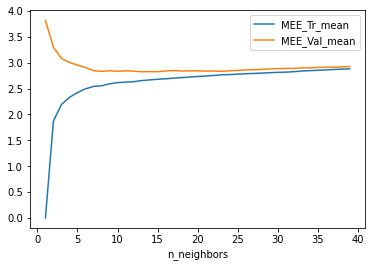

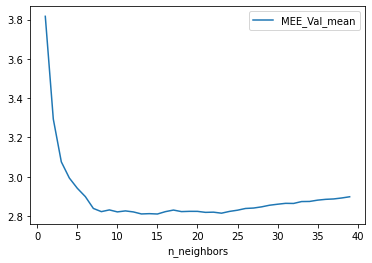

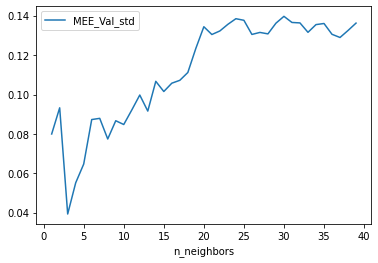

In [11]:
df_uni = df.loc[df['weights'] == 'uniform']
df_dist = df.loc[df['weights'] == 'distance']

# df_uni.plot(x='n_neighbors', y='MEE_mean')
ax = df_uni.plot(x='n_neighbors', y='MEE_Tr_mean')
df_uni.plot(ax=ax,x='n_neighbors', y='MEE_Val_mean')

df_dist.plot(x='n_neighbors', y='MEE_Val_mean')
df_dist.plot(x='n_neighbors', y='MEE_Val_std')


    


In [4]:
## FINAL MODEL EVALUATION
from MLCode.KCrossVal import MEE

df = load_shuffled_cup()
X_dev, Y_dev = np_cup_TR(df, test=False)
X_test, Y_test = np_cup_TR(df, test=True)
 
knn_model = KNeighborsRegressor(n_neighbors=15, weights='distance')
knn_model.fit(X_dev, Y_dev)
Y_out = knn_model.predict(X_test)

print('MEE on test set:')
MEE(Y_out, Y_test)



MEE on test set:


2.951515782139911

In [5]:
from MLCode.utils import load_cup_data, writeOutput
from MLCode.conf import path_data
from pathlib import Path

df_CUP_TS = load_cup_data(train=False)
X_CUP_TS = df_CUP_TS.to_numpy()
Y_CUP_TS = knn_model.predict(X_CUP_TS)
writeOutput(Y_CUP_TS, path_data / Path('Final_CUP_Result.csv'))
